In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(DBI)
library(dbplyr)
library(GGally)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Predicting the Win Rate of Tennis Players  
<img align="left" src="https://images.unsplash.com/photo-1554068865-24cecd4e34b8?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8dGVubmlzfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60" width="1000" />  

**Source: https://unsplash.com/photos/WqI-PbYugn4**

# Introduction<img align="left" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDixQBw3HoqS_gnC9xVtHO-5NrnS1eQ91N3w&usqp=CAU" width="35" />   


### <u> Background </u> 

Tennis is a popular, competitive sport played around the world.
Tennis can be played in "singles" where there is only one person on each side of the net or "doubles" where there are teams of two. 
It can be played on a variety of surfaces such as grass, clay, or hard court (i.e. like a gym floor).

The association of tennis professionals, or ATP, organizes these tournaments and collects data on the players and the matches that take place.

### <u> Our Question </u> 

Based on the career statistics of a tennis player, what will be their win rate?

### <u>  Our Dataset </u> 

We are using the "Game results for Top 500 Players from 2017-2019" dataset for our analysis. Each row in this dataset represents a singles match between two players. Each row contains player stats (e.g. age, height, rank) and match stats (break points, serve points, double faults etc.). We can use this data to determine the relationship between a player's stats and their win rate for this time period.

*Picture source: https://www.emojipng.com/preview/458725*

# Methods and Results<img align="left" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDixQBw3HoqS_gnC9xVtHO-5NrnS1eQ91N3w&usqp=CAU" width="35" />   


### <u> Outline </u>

We will first transform the dataset of tennis matches into a tidy dataset with only player stats. Next, we will look at the relationships between the different variables and win_rate to choose predictors for our regression models. To answer our predictive question, we will train both KNN and linear regression models and then compare to find the model type and predictors that give the lowest error. Once we have the best model, we will try to predict the win rate for a new player observation.

### <u> Exploring the Data </u> 

<b style="color:blue"> The code below reads the CSV file from the given URL link. </b>

In [18]:
# the dataset can be read from the URL link:
atp_data_frame <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
atp_data_frame

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,⋯,54,42,22,15,11,15,6,3650,8,2975
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667


*Table 1: Raw data table*

By mutating the data into nine predictors we can set KNN and Linear regression models to predict a player's career win rate. The predictors include:


| Variable                        | Explanation                                                                                         |
|---------------------------------|-----------------------------------------------------------------------------------------------------|
| Age (years)                     | Older players will have sustained more injuries and be less fit.                                    |
| Height (cm)                     | Height can provide an advantage when serving.                                                       |
| Serve Points that were Aces (%) | Winning points on a serve indicates a strong serve.                                                 |
| First Serves (%)                | The ratio of "first serve points" to "first serves made in" means a player's serve is more accurate |
| First Serves Won (%)            | Strong and accurate first serves will lead to fewer double faults.                                  |
| Second Serves Won (%)           | Strong second serves means fewer lost points due to a slow serve.                                   |
| Double Faults per Game (ratio)  | Fewer double faults per game indicates accurate serving.                                            |
| Breakpoints Saved (%)           | Preventing breaks means a player wins the important points for winning the match                    |
| Rank Points                     | Awarded to players by the ATP for winning matches                                                   |

*Table 2: List of Potential Predictors created for our data set*

The predictors related to serving are useful because a player has the most control over the match during the games when they are serving. For information on each type of serve stat see (Keith Prowse Editors) under references.

The stat on rank points is important because players earn a different number of rank points for each type of match (Nag, Utathya). Players may accumulate a lot of rank points by winning many lower ranked matches or by winning a few major matches, thus providing us insight to the wins a player may have.

<b style="color:blue"> The code below cleans and wrangles the raw data set into tidy form by grouping the observations by player. We mutate some statistics to percentages through ratios of the raw variables. We then obtain each player's "career stats" by joining observations in both winning and losing rounds to the player ID. This forms a data frame with each row representing an individual player.</b>

In [3]:
# calculate player wins and mean match stats for winning matches
player_wins <- atp_data_frame %>%
    group_by(player_id = winner_id) %>%
    summarize(w_height = mean(winner_ht, na.rm =TRUE),
              w_breakpoint_saved_pct = mean(w_bpSaved/w_bpFaced, na.rm =TRUE),
              w_second_serve_win_pct = mean(w_2ndWon / w_svpt,na.rm =TRUE),
              w_first_serve_pct = mean(w_1stWon / w_1stIn,na.rm =TRUE),
              w_first_serve_win_pct = mean(w_1stWon / w_svpt, na.rm = TRUE),
              n_wins = n(),
              mean_age_w  = mean(winner_age),
              mean_rank_points_w = mean(winner_rank_points),
              w_ace_point_pct = mean(w_ace/w_svpt,na.rm = TRUE)
             ) %>%
    drop_na() %>%
    mutate(player_id = as.character(player_id))

# calculate player losses and mean match stats for losing matches
player_lose <- atp_data_frame %>%
    group_by(player_id = loser_id) %>%
    summarize(l_height = mean(loser_ht, na.rm =TRUE),
              l_breakpoint_saved_pct = mean(l_bpSaved/l_bpFaced, na.rm =TRUE),
              l_second_serve_win_pct = mean(l_2ndWon / l_svpt,na.rm =TRUE),
              l_first_serve_pct = mean(l_1stWon / l_1stIn,na.rm =TRUE),
              l_first_serve_win_pct = mean(l_1stWon / l_svpt, na.rm = TRUE),
              n_lose = n(),
              mean_age_l  = mean(loser_age),
              mean_rank_points_l = mean(loser_rank_points),
              l_ace_point_pct = mean(l_ace/l_svpt,na.rm = TRUE)
             ) %>%
    drop_na() %>%
    mutate(player_id = as.character(player_id))

# join datasets for wins and losses using unique player ids
player_join <- left_join(player_wins, player_lose, by = NULL, copy = TRUE)

# calculate career stats for all player matches
player_career <- player_join %>%
    mutate(height = (w_height + l_height)/2,
          breakpoint_saved_pct = (w_breakpoint_saved_pct+l_breakpoint_saved_pct)/2,
          second_serve_win_pct = (w_second_serve_win_pct+l_second_serve_win_pct)/2,
          first_serve_pct = (w_first_serve_pct+l_first_serve_pct)/2,
          first_serve_win_pct = (w_first_serve_win_pct + l_first_serve_win_pct)/2,
          win_rate = (n_wins/(n_lose+n_wins)*100),
          age = (mean_age_w + mean_age_l) /2,
          mean_rank_points = (mean_rank_points_w + mean_rank_points_l)/2,
          ace_point_pct = (w_ace_point_pct+l_ace_point_pct)/2) %>%
    select(player_id,height,breakpoint_saved_pct,second_serve_win_pct,first_serve_pct,first_serve_win_pct, win_rate,age,mean_rank_points,ace_point_pct) %>%
    drop_na()
player_career

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "player_id"



player_id,height,breakpoint_saved_pct,second_serve_win_pct,first_serve_pct,first_serve_win_pct,win_rate,age,mean_rank_points,ace_point_pct
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100644,198,0.5592240,0.1700660,0.7351579,0.4788888,69.34673,21.15730,4281.6435,0.11124906
103333,208,0.7024075,0.1934502,0.8336761,0.5415601,41.02564,39.12084,962.8682,0.23093646
103819,185,0.6093525,0.2114465,0.7770562,0.4895284,84.17722,37.09069,6720.2910,0.10225660
103852,188,0.6435922,0.2029322,0.7678518,0.4570213,47.11538,36.59486,1064.2837,0.13948328
103893,183,0.6032682,0.2086046,0.7053554,0.4156136,34.56790,36.00516,929.3494,0.05544316
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
106071,193,0.6247593,0.1647858,0.7115762,0.4748335,36.06557,25.58023,653.8502,0.10261438
106233,185,0.5928571,0.2059738,0.7307146,0.4397496,69.26829,24.73736,4010.7090,0.07383174
106296,183,0.5769397,0.1768606,0.6743243,0.4253424,33.33333,25.12377,458.3750,0.07423463


*Table 3: Mutated data table used for data processing*

<b style="color:blue"> We split the player career dataset into testing and training sets by a 75/25 split. We decided that this split ratio allowed for enough observations to be used to train our model while still having enough observations in our test set to evaluate its accuracy. </b>

In [4]:
# split the data set into training and testing set. The following exploratory data analysis uses only the training set
set.seed(20)
player_split <- initial_split(player_career, prop = 0.75, strata = win_rate)
player_train <- training(player_split)
player_test <- testing(player_split)

<b style="color:blue">The table below contains the means of each quantitative variable in the training set. This gives an idea of the average statistics for a given player, which is relevant for exploratory data analysis. It tells us what sort of values (or percentages) we can expect for each stat.</b>

In [5]:
# the means of the predictor variables we plan to use in our analysis
exploratory_data_analysis_table <- player_train %>%
    select(-player_id) %>%
    map_df(mean, na.rm = TRUE)
exploratory_data_analysis_table

height,breakpoint_saved_pct,second_serve_win_pct,first_serve_pct,first_serve_win_pct,win_rate,age,mean_rank_points,ace_point_pct
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
186.0253,0.5947108,0.1958433,0.7193289,0.44232,45.90908,30.0706,1208.705,0.07991921


*Table 4: Mean Values for each Predictor Variable*

<b style="color:blue">The code below produces a visualization which is also very useful in our exploratory data analysis. By using the function `ggpairs`, we can see the "big picture" of all the relationships between each pair of variables. This visualization helps us pick which variables have a relatively strong relationship with win rate, and thus will be effective in predictions.</b>

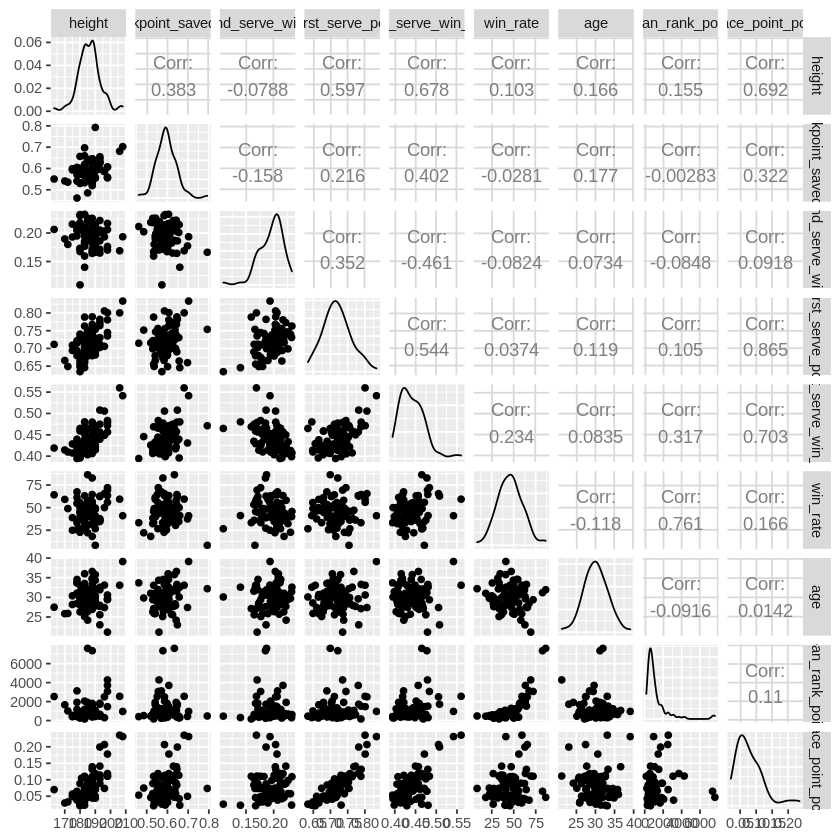

In [19]:
# select all quantitative predictors and visualize with ggpairs()
player_ggpairs <- player_train %>%
    select(-player_id) %>%
    ggpairs()

player_ggpairs

*Figure 1: Plot of All Predictor Relationships using ggpairs*

### <u> Model Selection </u> 

<b style="color:blue"> The first option for our model is K-NN regression for *individual predictors* with win_rate as the target value. In order to simplify the steps, we use a for loop to run the model on each predictor. The result is a table with 3 columns: predictor, best k value (as chosen through cross validation), and RMSPE.</b> 

<b style="color:red">Warning! The for_loop iteration may take time.</b>

In [7]:
set.seed(1)

# Create list of all predictors that we want to iterate through
predictors <- c(
    'height','breakpoint_saved_pct','second_serve_win_pct','first_serve_pct','first_serve_win_pct','age','mean_rank_points','ace_point_pct'
)

# setup results dataframe. Will have rows for each predictor and resulting RMSPE
results <- tibble()
results <- mutate(results, predictor = "", best_k = 0, rmspe = 0)

for (pred in predictors) {

    print(pred)
    
    # Select only win_rate and the single predictor for the recipe later
    train_data <- player_train %>%
        select(win_rate, all_of(pred))
    
    test_data <- player_test %>%
        select(win_rate, all_of(pred))
    
    tennis_recipe <- recipe(win_rate ~ ., data = train_data) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())
    
    tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("regression")
    
    tennis_vfold <- vfold_cv(train_data, v = 5, strata = win_rate)
    
    tennis_workflow <- workflow() %>%
       add_recipe(tennis_recipe) %>%
       add_model(tennis_spec)
    
    gridvals <- tibble(neighbors = seq(1,40))
    
    tennis_results <- tennis_workflow %>%
       tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
       collect_metrics() %>%
       filter(.metric == "rmse") %>%
       filter(mean == min(mean))
    
    kmin <- pull(tennis_results, neighbors)
    
    tennis_spec_kmin <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>%
       set_engine("kknn") %>%
       set_mode("regression")
    
    tennis_fit <- workflow() %>%
       add_recipe(tennis_recipe) %>%
       add_model(tennis_spec_kmin) %>%
       fit(data = train_data)
    
    rmspe_val <- tennis_fit %>%
       predict(test_data) %>%
       bind_cols(test_data) %>%
       metrics(truth = win_rate, estimate = .pred) %>%
       filter(.metric == "rmse") %>%
       select(.estimate) %>%
       pull()
    
    # Append predictor, best k, and rmspe value to the results dataframe
    results <- results %>%
        add_row(predictor = pred, best_k=kmin, rmspe = rmspe_val)
}

[1] "height"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "breakpoint_saved_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "second_serve_win_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "first_serve_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "first_serve_win_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "age"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "mean_rank_points"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "ace_point_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


In [8]:
results %>% arrange(rmspe)

predictor,best_k,rmspe
<chr>,<dbl>,<dbl>
mean_rank_points,7,10.24509
first_serve_win_pct,36,15.55832
height,37,15.89049
first_serve_pct,28,16.09443
age,39,16.23855
breakpoint_saved_pct,33,16.26547
second_serve_win_pct,32,16.31776
ace_point_pct,5,17.91994


*Table 5: Single Predictor Models with Best K Values and RMSPE*

<b style="color:blue"> The second option is K-NN regression for *combined predictors* with win_rate as the target. The combined predictors are chosen from the strongest relationships we observed in player_ggpairs. Again, we iterate with a for loop to reduce the amount of code. The resulting table contains the same 3 columns as the individual predictors.</b> 

<b style="color:red"> Warning! The for_loop iteration may take time.</b>

In [20]:
set.seed(1)

# list of formulas that will be used to generate recipes iteratively
formulas <- c(
"win_rate ~ mean_rank_points + first_serve_win_pct",
"win_rate ~ mean_rank_points + height",
"win_rate ~ mean_rank_points + first_serve_pct",
"win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct",
"win_rate ~ mean_rank_points + first_serve_pct + height"    
)

# setup results dataframe. Will have rows for each predictor and resulting RMSPE
multi_results <- tibble()
multi_results <- mutate(multi_results, predictor = "", best_k = 0, rmspe = 0)

for (f in formulas) {
    
    print(f)
    
    # Converts string formula to formula object
    tennis_recipe_multiple <- recipe(as.formula(f), data = player_train) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

    tennis_spec_mul <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("regression")
    
    tennis_vfold_mul <- vfold_cv(player_train, v = 5, strata = win_rate)
    
    tennis_workflow_multiple <- workflow() %>%
       add_recipe(tennis_recipe_multiple) %>%
       add_model(tennis_spec_mul)
    
    gridvals_mul <- tibble(neighbors = seq(1,40))
    
    tennis_results_multiple <- tennis_workflow_multiple %>%
       tune_grid(resamples = tennis_vfold_mul, grid = gridvals_mul) %>%
       collect_metrics() %>%
       filter(.metric == "rmse")
    if(f == "win_rate ~ mean_rank_points + first_serve_win_pct") {
    best_plot <- ggplot(tennis_results_multiple,aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "K", y = "RMSPE") + 
        theme(text = element_text(size = 20))
    }
    tennis_result_min <-  tennis_results_multiple %>%
       filter(mean == min(mean))
    
    kmin_multiple <- pull(tennis_result_min, neighbors)
    
    kmin_multiple
    
    tennis_spec_kmin_mul <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_multiple) %>%
       set_engine("kknn") %>%
       set_mode("regression")
    
    tennis_fit_multiple <- workflow() %>%
       add_recipe(tennis_recipe_multiple) %>%
       add_model(tennis_spec_kmin_mul) %>%
       fit(data = player_train)
    
    rmspe_val_mul <- tennis_fit_multiple %>%
       predict(player_test) %>%
       bind_cols(player_test) %>%
       metrics(truth = win_rate, estimate = .pred) %>%
       filter(.metric == "rmse") %>%
       select(.estimate) %>%
       pull()
    
    # append formula, best k and rmspe to results table
    multi_results <- multi_results %>%
        add_row(predictor = f, best_k = kmin_multiple, rmspe = rmspe_val_mul)
}

[1] "win_rate ~ mean_rank_points + first_serve_win_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "win_rate ~ mean_rank_points + height"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "win_rate ~ mean_rank_points + first_serve_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


[1] "win_rate ~ mean_rank_points + first_serve_pct + height"


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


In [21]:
multi_results %>%
    arrange(rmspe)

best_pred <- multi_results %>%
    slice(1)

predictor,best_k,rmspe
<chr>,<dbl>,<dbl>
win_rate ~ mean_rank_points + first_serve_win_pct,6,8.53232
win_rate ~ mean_rank_points + first_serve_pct,4,9.11855
win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct,2,10.46228
win_rate ~ mean_rank_points + height,4,10.46816
win_rate ~ mean_rank_points + first_serve_pct + height,2,11.78315


*Table 6: RMSPE and Best K Values for Multi Predictor Models*

<b style="color:blue"> The third option is linear regression for *individual predictors* with win_rate as the target. Again, we iterate with a for loop to reduce the amount of code. The resulting table has only 2 columns this time: predictor and RMSPE. Since the model is using linear regression, there is no k-value.</b> 

<b style="color:red"> Warning! The for_loop iteration may take time.</b>

In [11]:
set.seed(1)

# Create list of all predictors that we want to iterate through
lm_predictors <- c(
    'height','breakpoint_saved_pct','second_serve_win_pct','first_serve_pct','first_serve_win_pct','age','mean_rank_points','ace_point_pct'
)

# setup results dataframe. Will have rows for each predictor and resulting RMSPE
lm_results <- tibble()
lm_results <- mutate(lm_results, lm_predictor = "", lm_rmspe = 0)

for (lm_pred in lm_predictors) {

    print(lm_pred)
    
    # Select only win_rate and the single predictor for the recipe later
    lm_train_data <- player_train %>%
        select(win_rate, all_of(lm_pred))
    
    lm_test_data <- player_test %>%
        select(win_rate, all_of(lm_pred))
    
    tennis_lm_recipe <- recipe(win_rate ~ ., data = lm_train_data) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())
    
    tennis_lm_spec <- linear_reg() %>%
        set_engine("lm") %>%
        set_mode("regression")

    tennis_lm_fit <- workflow() %>%
       add_recipe(tennis_lm_recipe) %>%
       add_model(tennis_lm_spec) %>%
       fit(data = lm_train_data)
    
    lm_rmspe_val <- tennis_lm_fit %>%
         predict(lm_test_data) %>%
         bind_cols(lm_test_data) %>%
         metrics(truth = win_rate, estimate = .pred) %>%
         filter(.metric == "rmse") %>%
         select(.estimate) %>%
         pull()
    
    # Append predictor and rmspe value to the results dataframe
    lm_results <- lm_results %>%
        add_row(lm_predictor = lm_pred, lm_rmspe = lm_rmspe_val)
}

[1] "height"
[1] "breakpoint_saved_pct"
[1] "second_serve_win_pct"
[1] "first_serve_pct"
[1] "first_serve_win_pct"
[1] "age"
[1] "mean_rank_points"
[1] "ace_point_pct"


In [12]:
lm_results %>%
    arrange(lm_rmspe)

lm_predictor,lm_rmspe
<chr>,<dbl>
mean_rank_points,9.741566
first_serve_win_pct,15.125446
ace_point_pct,15.853011
first_serve_pct,15.898566
height,16.017920
breakpoint_saved_pct,16.036252
second_serve_win_pct,16.185250
age,16.220052


*Table 7: RMSPE for Single Variable Linear Regression*

<b style="color:blue"> Finally, the last option is linear regression for *combined predictors* with win_rate as the target. Again, we iterate with a for loop to reduce the amount of code. The result is presented by a table with 2 columns.</b> 

<b style="color:red"> Warning！the for_loop iteration may take time.</b>

In [13]:
set.seed(1)

# list of formulas that will be used to generate recipes iteratively
formulas <- c(
"win_rate ~ mean_rank_points + first_serve_win_pct",
"win_rate ~ mean_rank_points + height",
"win_rate ~ mean_rank_points + first_serve_pct",
"win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct",
"win_rate ~ mean_rank_points + first_serve_pct + height"    
)

# setup results dataframe. Will have rows for each predictor and resulting RMSPE
multi_lm_results <- tibble()
multi_lm_results <- mutate(multi_lm_results, lm_predictor = "", lm_rmspe = 0)

for (f in formulas) {

    print(f)
    
    # Converts string formula to formula object
    tennis_spec_lm <- linear_reg() %>%
        set_engine("lm") %>%
        set_mode("regression")
    
    tennis_recipe_lm <- recipe(as.formula(f), data = player_train)
    
    tennis_fit_lm <- workflow() %>%
        add_recipe(tennis_recipe_lm) %>%
        add_model(tennis_spec_lm) %>%
        fit(data = player_train)
    
    lm_rmspe_val <- tennis_fit_lm %>%
        predict(player_test) %>%
        bind_cols(player_test) %>%
        metrics(truth = win_rate, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

    # append formula, and rmspe to results table
    multi_lm_results <- multi_lm_results %>%
        add_row(lm_predictor = f, lm_rmspe = lm_rmspe_val)

}

[1] "win_rate ~ mean_rank_points + first_serve_win_pct"
[1] "win_rate ~ mean_rank_points + height"
[1] "win_rate ~ mean_rank_points + first_serve_pct"
[1] "win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct"
[1] "win_rate ~ mean_rank_points + first_serve_pct + height"


In [14]:
multi_lm_results %>%
    arrange(lm_rmspe)

lm_predictor,lm_rmspe
<chr>,<dbl>
win_rate ~ mean_rank_points + first_serve_pct + first_serve_win_pct,9.643020
win_rate ~ mean_rank_points + first_serve_pct,9.699788
win_rate ~ mean_rank_points + first_serve_pct + height,9.710520
win_rate ~ mean_rank_points + height,9.723320
win_rate ~ mean_rank_points + first_serve_win_pct,9.761017


*Table 8: RMSPE for Multi-Variable Linear Regression*

<b style="color:blue">Of all the model/predictor combinations, the one that produced the lowest RMSPE was K-NN regression with mean_rank_points and first_serve_win_pct as predictors. Therefore, this is the model we will use, and below is a plot of the relationship between its potential K values and RMSPE.</b>

predictor,best_k,rmspe
<chr>,<dbl>,<dbl>
win_rate ~ mean_rank_points + first_serve_win_pct,6,8.53232


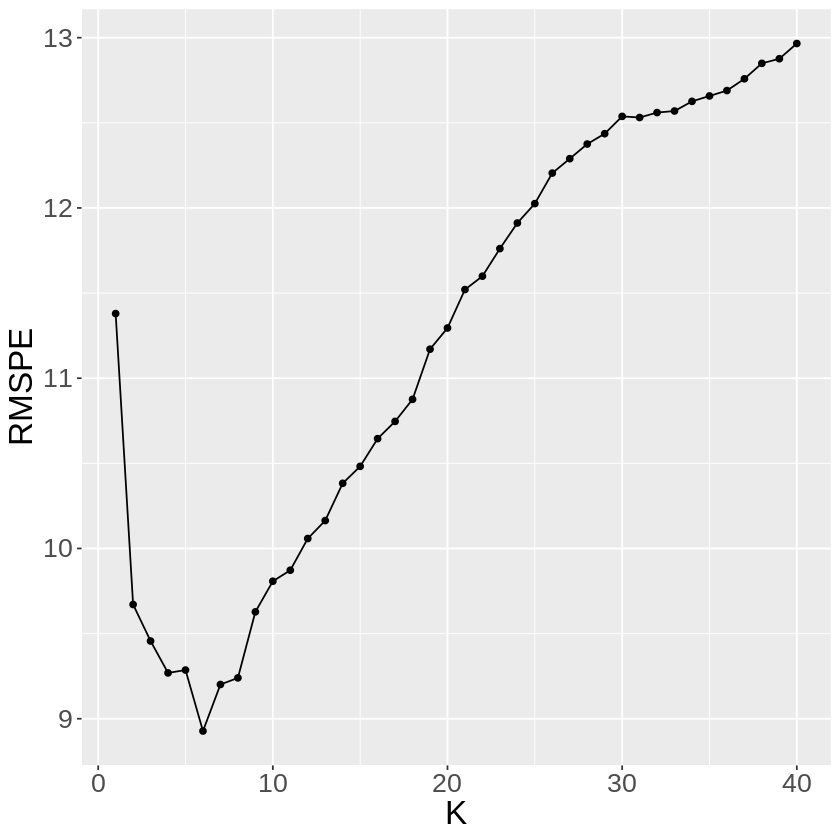

In [15]:
best_pred
best_plot

*Table 9 (above): Best RMSPE found*

*Figure 2 (below): K vs RMSPE for mean rank points and first serve win %*

### <u> Using the Model </u> 

<b style="color:blue"> Following our testing of the many potential models, the one that produces the lowest RMSPE is:</b>
- K-NN regression with mean rank points and first serve win percentage as predictors
- k = 6


<b style="color:blue"> Therefore, this is what we will use to predict win rate.</b>

In [16]:
set.seed(1)

tennis_recipe_final <- recipe(win_rate ~ mean_rank_points + first_serve_win_pct, data = player_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

tennis_model_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>%
    set_engine("kknn") %>%
    set_mode("regression")

tennis_fit_final <- workflow() %>%
    add_recipe(tennis_recipe_final) %>%
    add_model(tennis_model_final) %>%
    fit(data = player_train)

<b style="color:blue"> Now, we can try testing the model for some new players. These new players' individual statistics should reflect a predicted win rate that is either on average, below, or above the averaged win rate for all players.</b>

In [25]:
# create three new players (bad_player, player, good_player) with corresponding player statistics
new_players <- tibble(name = c("player", "bad_player", "good_player"), 
                      mean_rank_points = c(1400, 700, 2000), 
                      first_serve_win_pct = c(0.46, 0.22, 0.67))

prediction <- predict(tennis_fit_final, new_players) 
full_table <- bind_cols(new_players, prediction) %>%
    rename(predicted_win_rate = .pred)

full_table

name,mean_rank_points,first_serve_win_pct,predicted_win_rate
<chr>,<dbl>,<dbl>,<dbl>
player,1400,0.46,52.57210
bad_player,700,0.22,41.55690
good_player,2000,0.67,60.83039


*Table 10: New Players Analysis*

# Discussion <img align="left" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDixQBw3HoqS_gnC9xVtHO-5NrnS1eQ91N3w&usqp=CAU" width="35" />  

Overall, we found that a player's "mean rank points" and "first serve win %" are good predictors for estimating a player's win rate. Using these variables, we trained a KNN regression model that had RMSPE of only 8.53. This RMSPE is lower compared to a linear regression model using the same predictors. We tested our model on some newly created players, with varying rank points and a first serve win %s. We found that the predicted win rate reflected the stats accordingly. 

This result makes sense because a player that has lots of rank points and a strong serve is likely to win more games. The RMSPE differences between the KNN model and linear regression models was also expected because we observed a non-linear relationship between rank points and win rate. In our test players, the outcome was approximately what we would expect. If the player had good stats, then their predicted win rate would be higher, and vice versa for a player with bad stats.


Our model can predict the win rate of a tennis player using only a few statistics, and this could be useful in several ways. For one, it gives a sense of how the player will perform in the future. In other words, with the knowledge of their win rate, one can make a rough estimate of a player's chances in an upcoming match, tournament or season. This could be useful in a range of practical applications including scouting, sports betting, or even simply personal knowledge.


Some further questions that this analysis raised include: 

 - Are the other stats within the dataset able to be predicted by win rate and first serve win percentage (i.e. going off those two stats, can we be confident all the other stats are good)?
 - Are there stats not included in the dataset that could improve the effectiveness of the model?
 - Do certain stats influence win rate more, and if so, is there a better weight function to use in the regression engine?





# References <img align="left" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDixQBw3HoqS_gnC9xVtHO-5NrnS1eQ91N3w&usqp=CAU" width="35" /> 


Keith Prowse Editors. “Love? Ace? Tennis Terminology Explained: Tennis Glossary.” *Keith Prowse*, 2019, www.keithprowse.co.uk/news-and-blog/2019/01/02/tennis-terminology-explained/
\
\
Nag, Utathya. “Tennis Rankings: How They Work and Difference between ATP and Wta Systems.” *Tennis Rankings: Everything You Need to Know*, International Olympic Committee, 2021, www.olympics.com/en/featured-news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics
\
\
Timbers et al. \"Data Science: A First Introduction.\" *UBC Data Science*, 2021
\
\
**Data Source:** https://github.com/JeffSackmann/tennis_atp